# KLASIFIKASI AVES BERDASARKAN JENIS ORDO

### Kelompok B2_20

<ol> Anggota kelompok :
    <li>Denissa Putri Maha Rani - 2009106079 <br>
    <li>Alinda Azzahra - 2009106092 <br>
    <li>Nanda Sheptiana - 2009106096 <br>
</ol>

### Job desk

<li>Denissa Putri M.R : data collecting, data preprocessing, data analysis dan visualisasi
<li>Nanda Sheptiana : modeling
<li>Alinda Azzahra : evaluasi

### Dataset

<ul>
<li>Dataset : <a https://www.kaggle.com/datasets/imbikramsaha/bird-groups-classification > bird groups </a> <br>
<li>Sumber : kaggle <br>
<li>Owner : Bikram Saha <br>
<li>Visibility : Public <br>
Dataset yang digunakan dalam project ini adalah data kumpulan gambar aves atau burung. Data ini bisa diunduh melalui Kaggle. Dataset ini berisi 2000 lebih gambar yang terbagi menjadi 30 jenis ordo, namun kami hanya menggunakan 10 jenis ordo yaitu Order Anseriformes, Order Apodiformes, Order Caprimulgiformes, Order Casuariiformes, Order Ciconiiformes, Order Columbiformes, Order Gruiformes, Order Psittaciformes, Order Pteroclidiformes, Order Trogoniformes.
</ul>

Project deep learning yang kami buat adalah mengenai pengklasifikasian aves berdasarkan jenis ordonya. Setiap gambar burung atau aves akan diklasifikasikan ke dalam 10 kelas ordo. Project ini berguna untuk mengetahui jenis ordo dari aves yang ada di sekitar dan mengklasifikasikannya sesuai ciri masing masing ordo.

## Image processing

Image processing adalah pemrosesan gambar atau cara komputer melihat sebuah gambar. Komputer sendiri hanya bisa memproses data berupa angka. Gambar yang dilihat komputer berbentuk 2-Dimensioan array angka yang biasa disebut dengan
pixels.

## Preprocessing Data <br>

<li>Digunakan untuk mengubah data gambar mentah ke dalam format yang berguna dan efisien
<li> Split Data dibagi menjadi data train dan data test dengan menggunakan ImageDataGenerator. Pembagian dataset ini bertujuan agar nantinya dapat digunakan untuk melatih dan mengevaluasi kinerja model. Pada project ini 80% dataset digunakan untuk data train dan 20% untuk data test.

## Data augmentasi

Image Augmentation digunakan untuk menghasilkan gambar baru untuk melatih model deep learning. Pada project ini, augmentasi gambar adalah dengan menambahkan layer untuk melakukan fliping, rotating, zoom, dan scaling.

## Modelling 

Pada bagian modeling ini dibuat sebuah model yang nantinya akan dilatih untuk mengklasifikasikan data train gambar aves

# Data collecting

In [1]:
# import library yang akan digunakan

import os 
import shutil 
import re
import random 
import tensorflow 
import keras  
import glob 
# from skimage import io
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,  BatchNormalization, MaxPooling2D, Flatten, Dense

In [2]:
root_path = r'D:\KB_B2\KB_B2\dataset' 
source_path = os.path.join(root_path,'gambar') #tempat dataset gambar disimpan
destination_path = os.path.join(root_path, 'gambar fix') #tempat untuk menyimpan dataset yg sudah di split


In [3]:
#melihat banyak data gambar dalam folder

folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path,  folder)))

folders

{'Order Anseriformes': 100,
 'Order Apodiformes': 102,
 'Order Caprimulgiformes': 100,
 'Order Casuariiformes': 100,
 'Order Ciconiiformes': 101,
 'Order Columbiformes': 100,
 'Order Gruiformes': 100,
 'Order Psittaciformes': 101,
 'Order Pteroclidiformes': 100,
 'Order Trogoniformes': 100}

In [4]:
#tempat gambar disimpan (folder training dan testing)

if os.path.isdir(os.path.join(destination_path, 'data_training')):
    print(f"path {os.path.join(destination_path, 'data_training')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_training'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_training/{folder}'))

if os.path.isdir(os.path.join(destination_path, 'data_testing')):
    print(f"path {os.path.join(destination_path, 'data_testing')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_testing'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_testing/{folder}'))

path D:\KB_B2\KB_B2\dataset\gambar fix\data_training sudah ada
path D:\KB_B2\KB_B2\dataset\gambar fix\data_testing sudah ada


In [5]:
files_name = {
     'Order Anseriformes':[],
     'Order Apodiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Ciconiiformes': [],
     'Order Columbiformes': [],
     'Order Gruiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Trogoniformes': [],
}

files_train = {
     'Order Anseriformes':[],
     'Order Apodiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Ciconiiformes': [],
     'Order Columbiformes': [],
     'Order Gruiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Trogoniformes': [],
}

files_test = {
     'Order Anseriformes':[],
     'Order Apodiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Ciconiiformes': [],
     'Order Columbiformes': [],
     'Order Gruiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Trogoniformes': [],
}

In [6]:
for type in files_name.keys():
    for file in os.listdir(os.path.join(source_path, type)):
        if os.path.getsize(os.path.join(source_path, f'{type}/{file}')):
            files_name[type].append(file)
        else:
            print(f'{file} dilewatkan')

## Data Preprocessing

In [7]:
#spli dataset 80% untuk data training dan 20% untuk data testing

split_point = {
     'Order Anseriformes':0,
     'Order Apodiformes': 0,
     'Order Caprimulgiformes': 0,
     'Order Casuariiformes': 0,
     'Order Ciconiiformes': 0,
     'Order Columbiformes': 0,
     'Order Gruiformes': 0,
     'Order Psittaciformes': 0,
     'Order Pteroclidiformes': 0,
     'Order Trogoniformes': 0,
}

for key in split_point.keys():
    split_point[key] = int(len(files_name[key])*.8)

split_point 

for key in files_train.keys():
    files_train[key].append(files_name[key][:split_point[key]])
    files_test[key].append(files_name[key][split_point[key]:])

# print(files_train, files_test)

In [8]:
#mengecek jumlah gambar dalam folder pada files_train 

# len(files_train['Order Anseriformes'][0])

In [9]:
#mengecek jumlah gambar dalam folder pada files_test 

# len(files_test['Order Casuariiformes'][0])

In [10]:
# source_path

In [11]:
# destination_path

In [12]:
for type in files_name.keys():
    for file in files_train[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_training/{type}/{file}')
        )
    for file in files_test[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_testing/{type}/{file}')
        )

## Training & Modeling Data 


## Data augmentasi

In [13]:
# melakukan training dan validasi data generator dengan ImageDataGenerator

train_generator = ImageDataGenerator(
                               rescale=1/255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=60,
                               zoom_range=0.5,
                               fill_mode='nearest')

val_generator = ImageDataGenerator(
                               rescale=1/255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=60,
                               zoom_range=0.5,
                               fill_mode='nearest')

In [14]:
# melakukan training data generator dengan folder training dan validasi data dengan folder testing

train_data = train_generator.flow_from_directory('D:\KB_B2\KB_B2\dataset\gambar fix\data_training',
                                             target_size=(150, 150),
                                             batch_size=64,
                                             class_mode='categorical')

val_data = val_generator.flow_from_directory('D:\KB_B2\KB_B2\dataset\gambar fix\data_testing',
                                             target_size=(150, 150),
                                             batch_size=64,
                                             class_mode='categorical')

Found 801 images belonging to 10 classes.
Found 203 images belonging to 10 classes.


In [15]:
image, label = train_data.next()

In [16]:
labels_data=[
     'Order Anseriformes',
     'Order Apodiformes',
     'Order Caprimulgiformes',
     'Order Casuariiformes',
     'Order Ciconiiformes',
     'Order Columbiformes',
     'Order Gruiformes',
     'Order Psittaciformes',
     'Order Pteroclidiformes',
     'Order Trogoniformes',
    
]

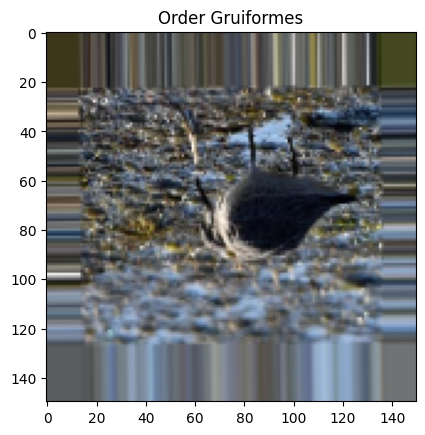

In [17]:
#menampilkan dataset gambar

plt.title(labels_data[tf.argmax(label[0])])
plt.imshow(image[0])

In [18]:
# melakukan modeling data pada data testing dan training

model_data = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),    
    
    Conv2D(512, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),    
    
    Flatten(),
    Dense(512, activation='relu'), 
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
#     Dense(512, activation='relu'), 
    Dense(10, activation='softmax')
])

In [19]:
model_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)      512       
 hNormalization)                                                 
                                                        

In [20]:
# melakukan compile data

model_data.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), 
                metrics=['accuracy'],
                run_eagerly=True)

In [21]:
# melakukan training model

history = model_data.fit(
                    train_data,                    
                    epochs=55,
                    validation_data=val_data,                    
                    verbose=2)

Epoch 1/55
13/13 - 82s - loss: 2.3438 - accuracy: 0.1698 - val_loss: 2.3038 - val_accuracy: 0.1034 - 82s/epoch - 6s/step
Epoch 2/55
13/13 - 80s - loss: 2.0525 - accuracy: 0.2784 - val_loss: 2.3134 - val_accuracy: 0.1084 - 80s/epoch - 6s/step
Epoch 3/55
13/13 - 79s - loss: 1.9541 - accuracy: 0.2984 - val_loss: 2.3177 - val_accuracy: 0.1034 - 79s/epoch - 6s/step
Epoch 4/55
13/13 - 81s - loss: 1.8530 - accuracy: 0.3670 - val_loss: 2.3218 - val_accuracy: 0.1034 - 81s/epoch - 6s/step
Epoch 5/55
13/13 - 80s - loss: 1.7552 - accuracy: 0.3833 - val_loss: 2.3521 - val_accuracy: 0.1034 - 80s/epoch - 6s/step
Epoch 6/55
13/13 - 79s - loss: 1.7183 - accuracy: 0.3970 - val_loss: 2.4232 - val_accuracy: 0.1034 - 79s/epoch - 6s/step
Epoch 7/55
13/13 - 79s - loss: 1.6457 - accuracy: 0.4082 - val_loss: 2.5088 - val_accuracy: 0.1034 - 79s/epoch - 6s/step
Epoch 8/55
13/13 - 77s - loss: 1.5781 - accuracy: 0.4307 - val_loss: 2.5570 - val_accuracy: 0.0985 - 77s/epoch - 6s/step
Epoch 9/55
13/13 - 77s - loss: 1

## Evaluasi

In [24]:
hasil = model_data.evaluate(val_data, batch_size=32, verbose=0)
print('Test Loss: ', hasil[0])
print('Test Accuracy: ', hasil[1])

Test Loss:  2.178441047668457
Test Accuracy:  0.35960590839385986


In [25]:
y_train = history.history['accuracy']
y_val = history.history['val_accuracy']

train_y = history.history['loss']
val_y = history.history['val_loss']
x = range(len(y_train))

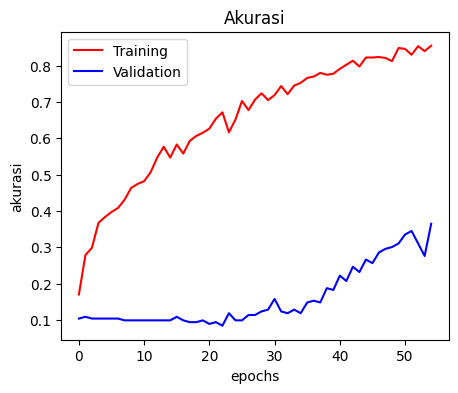

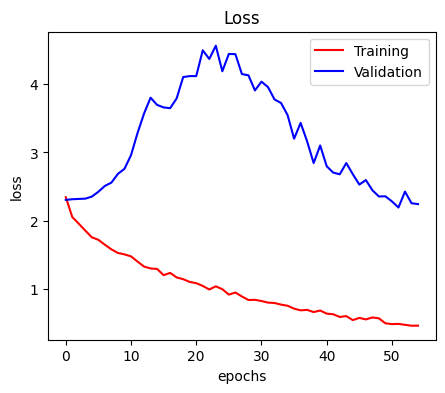

In [29]:
# plot perubahan nilai loss dan akurasi

plt.figure(1, figsize=(5,4))
plt.plot(x, y_train, c='r', label='Training')
plt.plot(x, y_val, c='b', label='Validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('akurasi')
plt.title('Akurasi')

plt.figure(2, figsize=(5,4))
plt.plot(x, train_y, c='r', label='Training')
plt.plot(x, val_y, c='b', label='Validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')

plt.show()

In [ ]:
model_data.save('./Model/Model_Finished')

In [31]:
model_data.save('./Model/Model_Finished.h5')